In [11]:
import numpy as np
import matplotlib.pyplot as plt

Решается уравнение
\begin{cases}
a_n y^{(n)} + \dots + a_1 y' + a_0 y = f(t) \\
y(t_0) = y_0 \\
\dots \\
y^{(n-1)}(t_0) = y_0^{(n-1)}
\end{cases}
Сделаем замену
\begin{eqnarray}
y_1(t) = y(t) \\
y_2(t) = y'(t) \\
\dots \\
y_n(t) = y^{(n-1)}(t)
\end{eqnarray}
Получим систему 
\begin{cases}
y'_1 = y_2 \\
\dots \\
y'_{n-1} = y_n \\
y'_n = \frac{f(t) - a_{n-1}y_n - \dots - a_0y_1}{a_n}
\end{cases}
Решаем её методом Эйлера

Уравнение задается следующими параметрами:

coefs - массив коэффициентов ($coefs[i] = a_i$)

f - правая часть в виде lambda-функции

start - массив начальных условий ($start[i] = y^{(i)}(t_0)$)

a, b - начало и конец отрезка, на котором ищется решение

N - параметр разбиения

In [12]:
def solve(coefs, f, start, a, b, N):
    h = (b-a) / (N-1)
    dim = len(coefs) - 1
    result = np.zeros(N)
    current_system_solvation = start.copy()
    result[0] = current_system_solvation[0]
    F = np.zeros(dim)
    F[0:dim-1] = current_system_solvation[1:dim]
    for i in range(1, N):
        F[dim-1] = (f(a + h*i) - np.dot(coefs[0:dim], current_system_solvation)) / coefs[dim]
        current_system_solvation = current_system_solvation + h*F
        # Т.к. интересует само решение, то выбирается 0-ая компонента, которая соответствует y(t_i).
        # Если бы требовалось найти k-ую производную решения, то писали бы current_system_solvation[k].
        result[i] = current_system_solvation[0]
        F[0:dim-1] = current_system_solvation[1:dim]
    return result

def error_norm(y1, y2):
    return np.max(np.abs(y1-y2))

Рассмотрим тестовую задачу, для которой известно точное решение:
\begin{cases}
y'' + y = t^2 + 2 \\
y(0) = 0 \\
y'(0) = 1
\end{cases}

Точное решение $y = sin(t) + t^2$

Error= 0.041741330020651723


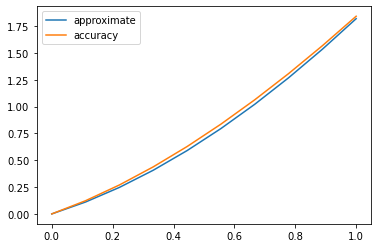

In [13]:
N = 10
y_accur = lambda t:t**2 + np.sin(t)
t = np.linspace(0, 1, N)
y_approx = solve(coefs=np.array([1,0,1]), f=lambda t: t**2 + 2, start=np.array([0,1]), a=0, b=1, N=N)
print("Error=", error_norm(y_approx, y_accur(t)))
plt.plot(t, y_approx, label='approximate')
plt.plot(t, y_accur(t), label='accuracy')
plt.legend()

In [14]:
Ns = [8, 16, 32, 64, 128, 256]
for N in Ns:
    t = np.linspace(0, 1, N)
    y_approx = solve(coefs=np.array([1,0,1]), f=lambda t: t**2 + 2, start=np.array([0,1]), a=0, b=1, N=N)
    print("Error=", error_norm(y_approx, y_accur(t)))

Error= 0.05533629291498876
Error= 0.023720930161666542
Error= 0.010957387482150693
Error= 0.00527482268032009
Error= 0.002588148753889574
Error= 0.0012820193765282761


По-видимому, метод реализован правильно :)

Видно так же, что при уменьшении шага h в 2 раза, ошибка уменьшается в 2 раза, то есть точность аппроксимации $O(h)$. Это соответствует теретической точности данного метода.

Теперь перейдем к решению задачи из ТЗ.

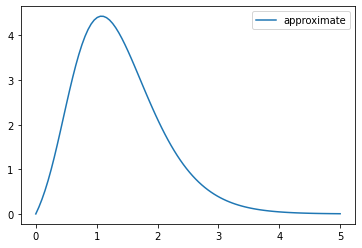

In [15]:
N = 100
t = np.linspace(0, 5, N)
y_approx = solve(coefs=np.array([243, 405, 270, 90, 15, 1]), f=lambda t: 0*t, start=np.array([0,3,9,8,0]), a=0, b=5, N=N)
plt.plot(t, y_approx, label='approximate')
plt.legend()

Однако, т.к. метод Эйлера явный, он неустойчив, и при малых N все ломается.

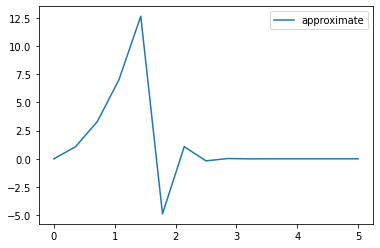

In [23]:
N = 15
t = np.linspace(0, 5, N)
y_approx = solve(coefs=np.array([243, 405, 270, 90, 15, 1]), f=lambda t: 0*t, start=np.array([0,3,9,8,0]), a=0, b=5, N=N)
plt.plot(t, y_approx, label='approximate')
plt.legend()

In [24]:
class LinearEquation:

    def __init__(self, coefs, f, start_conditions, a, b):
        self.__coefs = coefs
        self.__f = f
        self.__start = start_conditions
        self.__a = a
        self.__b = b
        self.__h = b - a

    # Решение явным методом Рунге-Кутты 4-го порядка
    def solve_by_explicit_method(self, N):
        pass

    # Решение неявным методом Рунге-Кутты 2-го порядка
    def solve_by_implicit_method(self, N):
        pass

    def get_coefs(self):
        return self.__coefs.copy()

    def get_h(self, N):
        self.__h /= (N - 1)
        return self.__h

    def get_dim(self):
        return len(self.__start)

    def get_start_cond(self):
        return self.__start.copy()

    def get_f(self, t):
        return self.__f(t)

    # Получение координаты t для ТЕКУЩЕГО шага, то есть для того, на котором считается ноевое значение
    def get_t_n(self, n):
        return self.__a + n*self.__h


In [25]:

class LinearEquationWithConstantCoefs(LinearEquation):

    def __init__(self, coefs, f, start_conditions, a, b):
        super().__init__(coefs, f, start_conditions, a, b)

    def solve_by_explicit_method(self, N):
        h = self.get_h(N)
        coefs = self.get_coefs()
        dim = self.get_dim()
        result = np.zeros((dim, N))  # k-ая строка в result соответсвтует k-ой производной решения.
        result[:, 0] = self.get_start_cond()
        F = np.zeros(dim)
        F[:dim - 1] = result[1:, 0]
        for n in range(1, N):
            F[dim - 1] = (self.get_f(self.get_t_n(n) - h) - np.dot(coefs[:dim], result[:, n - 1])) / coefs[dim]
            # k1 = F
            k2 = F.copy()
            k2[:dim - 1] += h / 2 * F[:dim - 1]
            k2[dim - 1] = self.get_f(self.get_t_n(n) - h / 2) - np.dot(coefs[:dim],
                                                                       result[:dim, n - 1] + h / 2 * F[:dim])

            k3 = F.copy()
            k3[:dim - 1] += h / 2 * k2[:dim - 1]
            k3[dim - 1] = self.get_f(self.get_t_n(n) - h / 2) - np.dot(coefs[:dim],
                                                                       result[:dim, n - 1] + h / 2 * k2[:dim])

            k4 = F.copy()
            k3[:dim - 1] += h * k3[:dim - 1]
            k3[dim - 1] = self.get_f(self.get_t_n(n)) - np.dot(coefs[:dim],
                                                               result[:, n - 1] + h / 2 * k3[:dim])
            result[:, n] = result[:, n - 1] + h / 6 * (F + 2 * k2 + 2 * k3 + k4)
            F[:dim - 1] = result[1:, n]
        return result

    def solve_by_implicit_method(self, N):
        h = self.get_h(N)
        coefs = self.get_coefs()
        dim = self.get_dim()
        result = np.zeros((dim, N))  # k-ая строка в result соответсвтует k-ой производной решения.
        result[:, 0] = self.get_start_cond()
        F = np.zeros(dim)
        F[:dim - 1] = result[1:, 0]
        for n in range(1, N):
            F[dim - 1] = (self.get_f(self.get_t_n(n) - h) - np.dot(coefs[:dim], result[:, n - 1])) / coefs[dim]
            forecast = result[:, n - 1] + h * F
            F_n = np.zeros(dim)
            F_n[:dim-1] = forecast[1:]
            F_n[dim-1] = (self.get_f(self.get_t_n(n) - h) - np.dot(coefs[:dim], forecast)) / coefs[dim]
            result[:, n] = result[:, n - 1] + h * (F + F_n) / 2
            F[:dim - 1] = result[1:, n]
        return result



Решим эту задачу явным методом Рунге-Кутты 4-го порядка

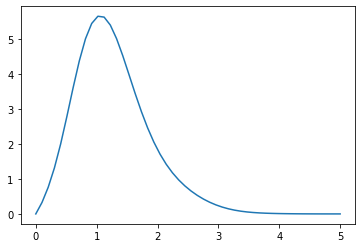

In [26]:
N = 50
eq = LinearEquationWithConstantCoefs(coefs=np.array([243, 405, 270, 90, 15, 1]),
                                     f=lambda t: 0 * t, start_conditions=np.array([0, 3, 9, 8, 0]),
                                     a=0, b=5)
y = eq.solve_by_explicit_method(N)
t = np.linspace(0, 5, N)
plt.plot(t, y[0])
plt.show()

Но при N=25 все так же ломается

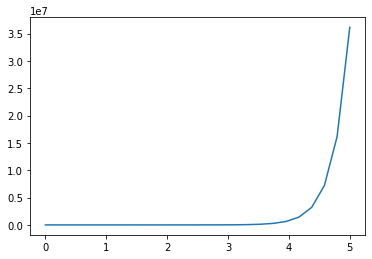

In [29]:
N = 25
eq = LinearEquationWithConstantCoefs(coefs=np.array([243, 405, 270, 90, 15, 1]),
                                     f=lambda t: 0 * t, start_conditions=np.array([0, 3, 9, 8, 0]),
                                     a=0, b=5)
y = eq.solve_by_explicit_method(N)
t = np.linspace(0, 5, N)
plt.plot(t, y[0])
plt.show()

Решим неявным методом Рунге-Кутты 2-го порядка

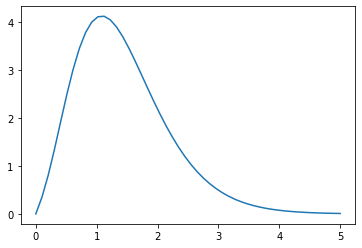

In [30]:
N = 50
eq = LinearEquationWithConstantCoefs(coefs=np.array([243, 405, 270, 90, 15, 1]),
                                     f=lambda t: 0 * t, start_conditions=np.array([0, 3, 9, 8, 0]),
                                     a=0, b=5)
y = eq.solve_by_implicit_method(N)
t = np.linspace(0, 5, N)
plt.plot(t, y[0])
plt.show()

Этот метод более устойчив, однако и он ломается при меньших N. 

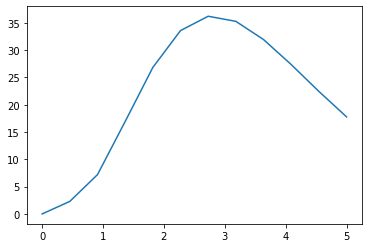

In [32]:
N = 12
eq = LinearEquationWithConstantCoefs(coefs=np.array([243, 405, 270, 90, 15, 1]),
                                     f=lambda t: 0 * t, start_conditions=np.array([0, 3, 9, 8, 0]),
                                     a=0, b=5)
y = eq.solve_by_implicit_method(N)
t = np.linspace(0, 5, N)
plt.plot(t, y[0])
plt.show()